## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

### Challenge


For the next steps, let's review the data exploration that we've done yesterday:

Read the .csv file and store it in a Pandas DataFrame called df. Have a look at the read_csv() documentation and try to provide these column names: ['DATE', 'TAG', 'POSTS']

Look at the first and last 5 rows of the DataFrame.

How many rows and how many columns does it have?

Count the number of entries in each column.

## Import Statements

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [11]:
df =pd.read_csv('002 QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [12]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [13]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [14]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [18]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

#### Challenge: Calculate the total number of post per language.

The TAG is the name of the programming language. So for example in July 2008, there were 3 posts tagged with the language C#. Given that the TAG serves as our category column, can you figure out how to count the number of posts per language? Which programming language had the most number of posts since the creation of Stack Overflow? (Hint: you may need to review one of yesterday's lessons).

Which Programming language has had the highest total number of posts of all time?uage?

In [24]:
df.groupby('TAG').sum().head()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212


### If we .sum() the number of posts then we can see how many posts each programming language had since the creation of Stack Overflow.

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [31]:
df.groupby('TAG').count().head()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144


### If we .count() the entries in each column, we can see how many months of entries exist per programming language.

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

##### Selecting an Individual Cell

Let's take a closer look at the 'DATE' column in our DataFrame. We can use the double square bracket notation to look at the second entry in the column: 

df['DATE'][1]
Alternatively, for column names no spaces, we can also use the dot-notation:

df.DATE[1]
I prefer the square bracket notation for column names since it's more flexible, but with the dot notation, you get to use autocomplete, which is also nice.



In [35]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [36]:
df.DATE[1]

'2008-08-01 00:00:00'

#### Inspecting the Data Type

When we type check the contents of this cell, we see that we are not dealing with a date object, but rather with a string.



In [41]:
type(df['DATE'][1])

str

This is not very handy. Not only will the string format always show the unnecessary 00:00:00, but we also don't get the benefit of working with Datetime objects, which know how to handle dates and times. Pandas can help us convert the string to a timestamp using the to_datetime() method.

Here's how we can convert the entry in our cell and check that it worked:

In [43]:
print(pd.to_datetime(df['DATE'][1]))

2008-08-01 00:00:00


In [44]:
type(pd.to_datetime(df['DATE'][1]))


pandas._libs.tslibs.timestamps.Timestamp

### CONVERTING WHOLE COLUMN

Let's use Pandas' to_datetime() to convert the entire df['DATE'] column.

In [46]:
df.DATE = pd.to_datetime(df.DATE)

## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [49]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [47]:
df.shape

(1991, 3)

In [48]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

### Challenge: Count the number of entries per programming language. Why might the number of entries be different? 


Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df.er column.

In [102]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [59]:
reshaped_df = df.pivot(index = 'DATE' , columns = 'TAG' , values = 'POSTS')
reshaped_df.fillna(0, inplace = True)


Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

In [56]:
reshaped_df.shape

(145, 14)

Examine the head and the tail of the DataFrame. What does it look like?

In [60]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [61]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


Print out the column names.

In [66]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

Count the number of entries per column.

In [67]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

##### We can also check if there are any NaN values left in the entire DataFrame with this line:

reshaped_df.isna().values.any()
Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True.

In [69]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


In [70]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


### Mini Challenge

You can actually show a line chart for the popularity of a programming language using only a single line of code. Can you use the .plot() documentation to figure out how to do this? Try and plot the popularity of the Java programming language. Here's what you're aiming for:

###  Styling the Chart

Let's look at a couple of methods that will help us style our chart:

.figure() - allows us to resize our chrt

.xticks() - configures our xaxis

.yticks() - configures oury-axis

.xlabel() - add text to te x-axis

.ylabel() - add text tothe y-axis

.ylim() - allows us to set a lower a

***To make our chart larger we can provide a width (16) and a height (10) as the figsize of the figure.***

plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)
This will make our chart easier to see. But when we increase the size of the chart, we should also increase the fontsize of the ticks on our axes so that they remain easy to rd:

nd upper bound

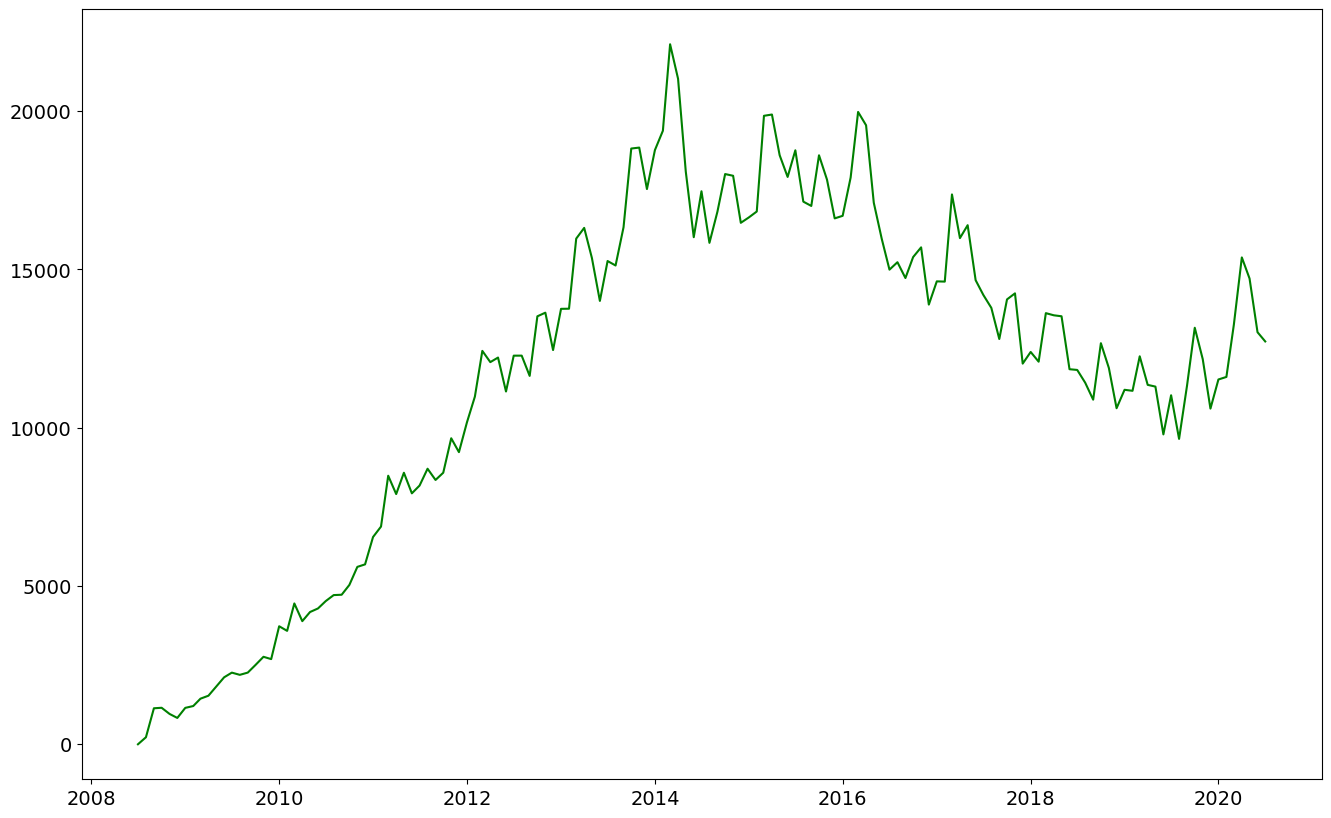

In [81]:
fig = plt.figure(figsize =(16,10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.plot(reshaped_df.index,reshaped_df.java,'g')

Now we can add labels. Also, we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with .ylim().000)

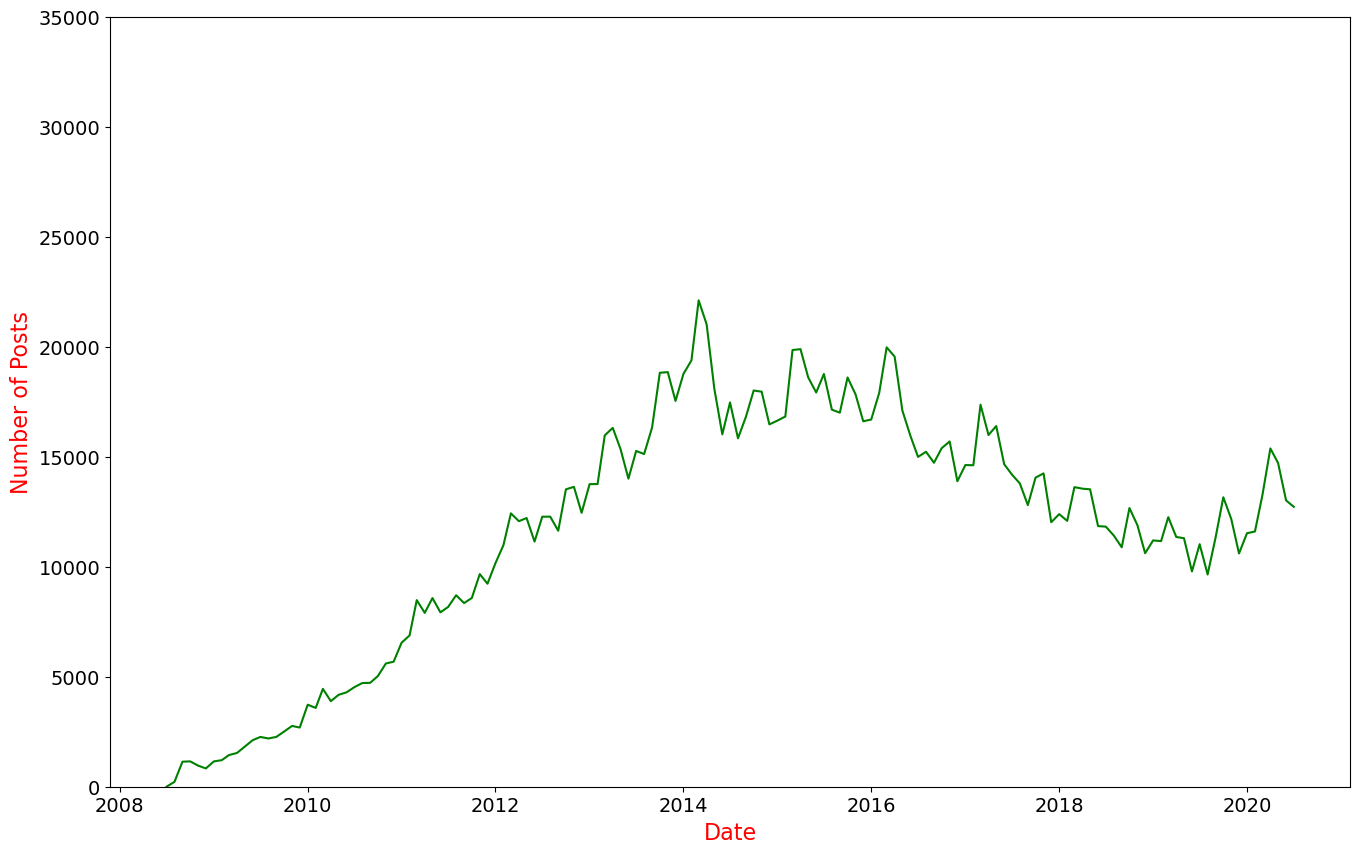

In [85]:
fig = plt.figure(figsize =(16,10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Date', fontsize=16 , color = 'r')
plt.ylabel('Number of Posts', fontsize=16 , color='r')
plt.ylim(0, 35000)
plt.plot(reshaped_df.index,reshaped_df.java ,'g')

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

(0.0, 35000.0)

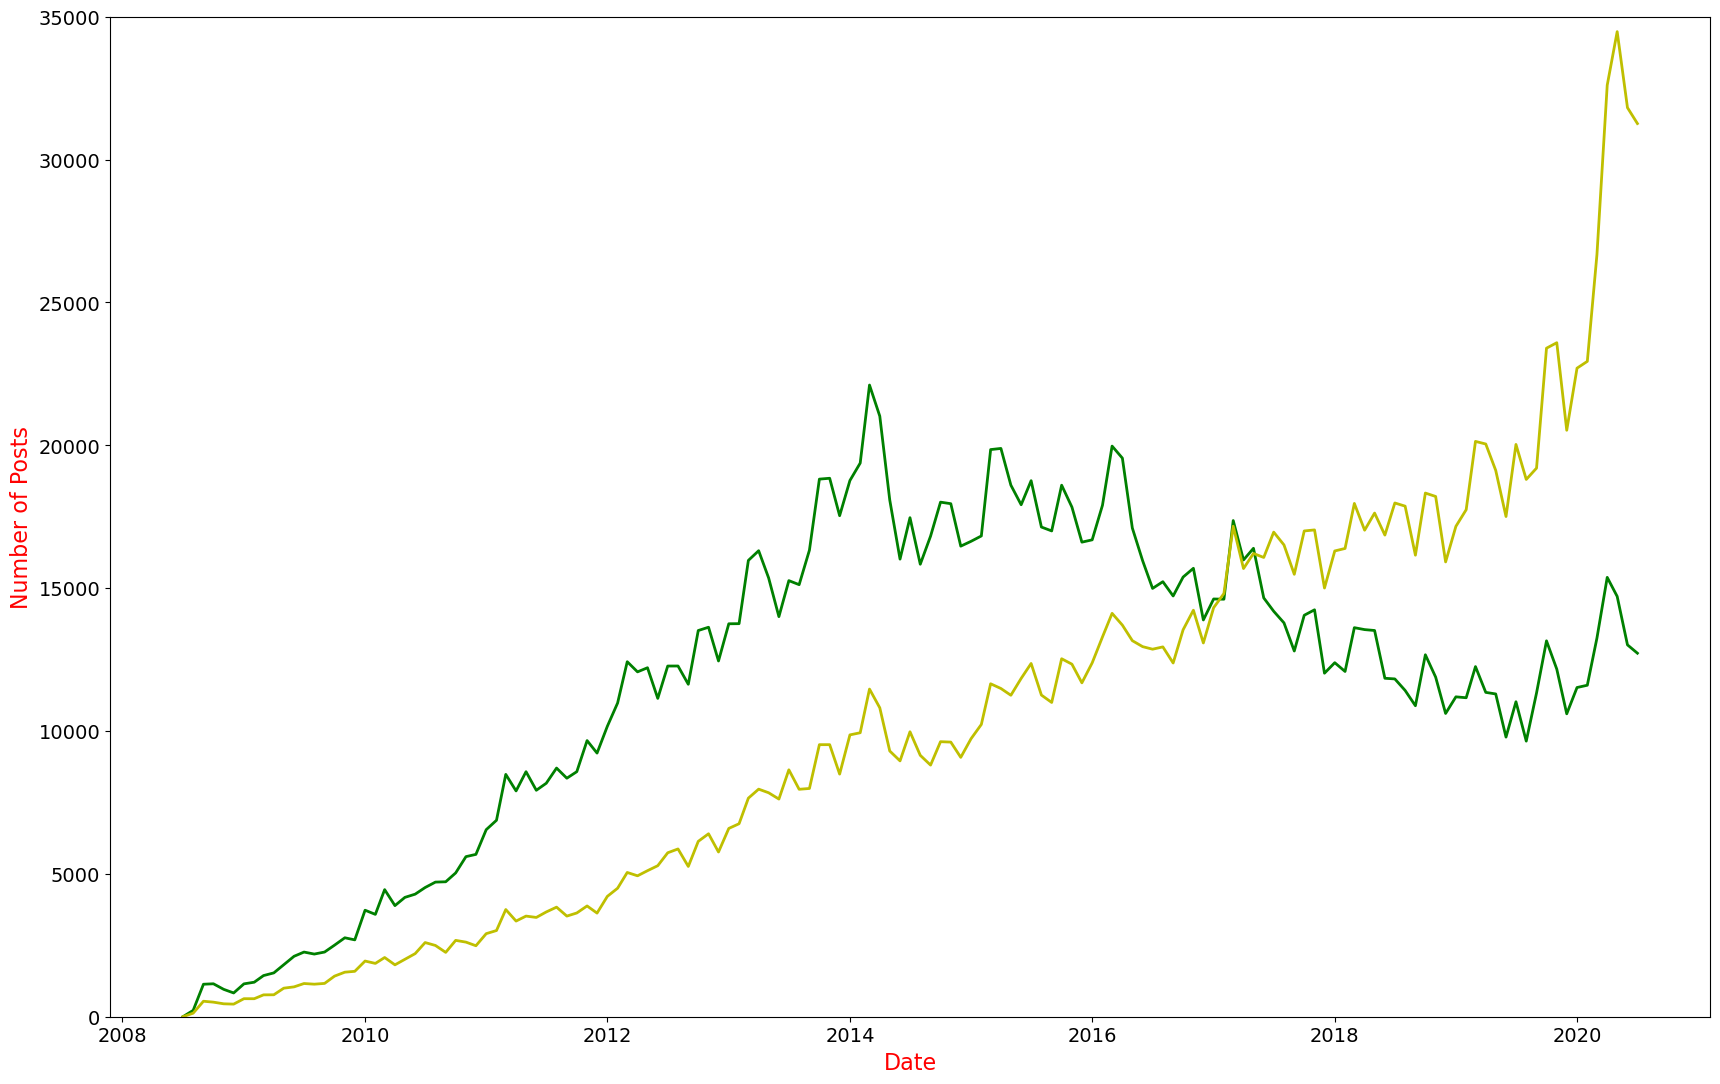

In [88]:
fig= plt.figure(figsize =(16,10))
ax = fig.add_axes([0,0, 1,1])
ax.plot(reshaped_df.index,reshaped_df.java,'g', linewidth = 2)
ax.plot(reshaped_df.index,reshaped_df.python,'y', linewidth = 2)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Date', fontsize=16 , color = 'r')
plt.ylabel('Number of Posts', fontsize=16 , color='r')
plt.ylim(0, 35000)

But what if we wanted to plot all the programming languages on the same chart? We don't want to type out .plot() a million times, right? We can actually just use a for-loop:

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])
This will allow us to iterate over each column in the DataFrame and plot it on our chart. The final result should look like this:

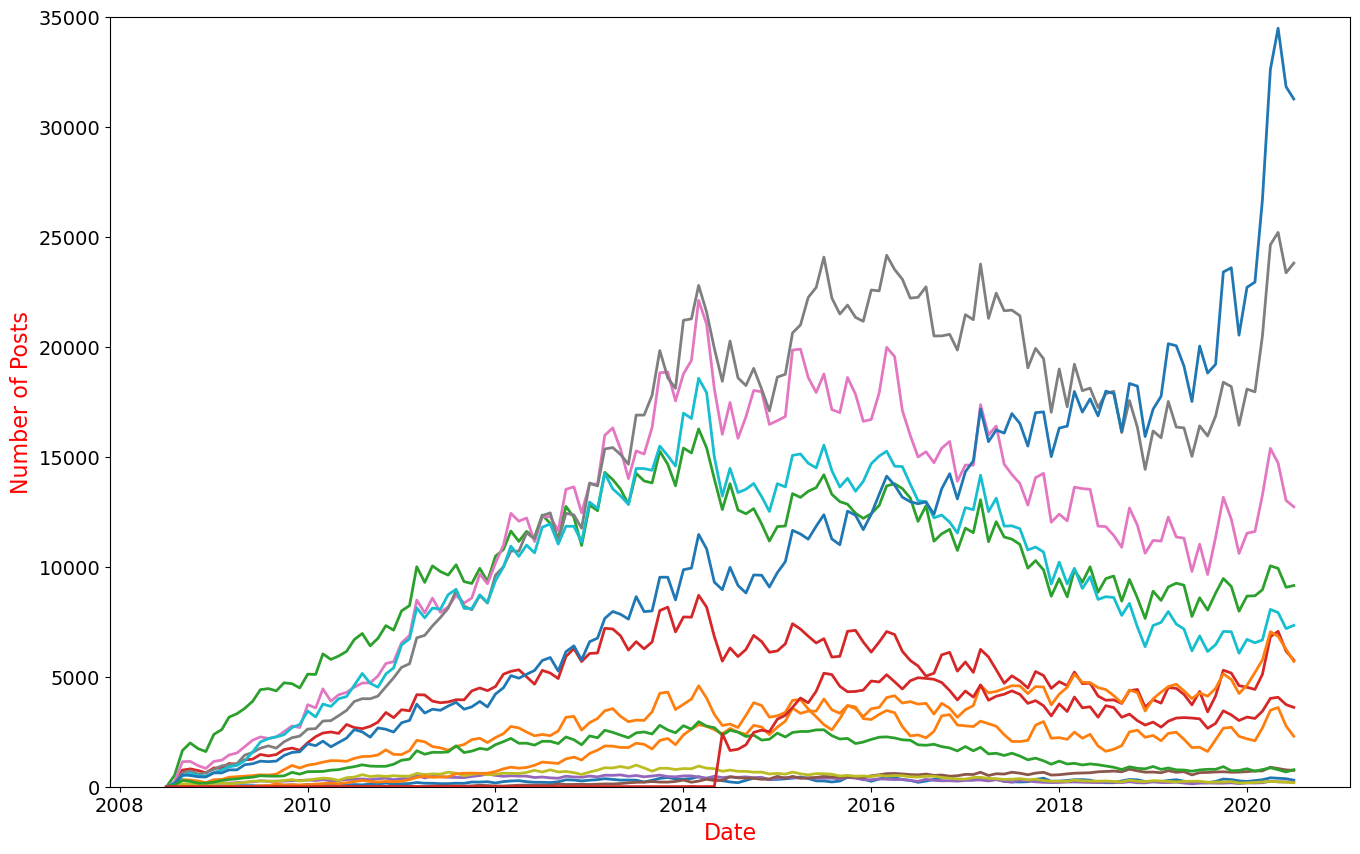

In [92]:
fig = plt.figure(figsize =(16,10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Date', fontsize=16 , color = 'r')
plt.ylabel('Number of Posts', fontsize=16 , color='r')
plt.ylim(0, 35000)
# plot all columns
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],linewidth = 2)


But wait, which language is which? It's really hard to make out without a legend that tells us which colour corresponds to each language. Let's modify the plotting code to add a label for each line based on the column name (and make the lines thicker at the same time using linewidth). Then let's add a legend to our chart:

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16) 


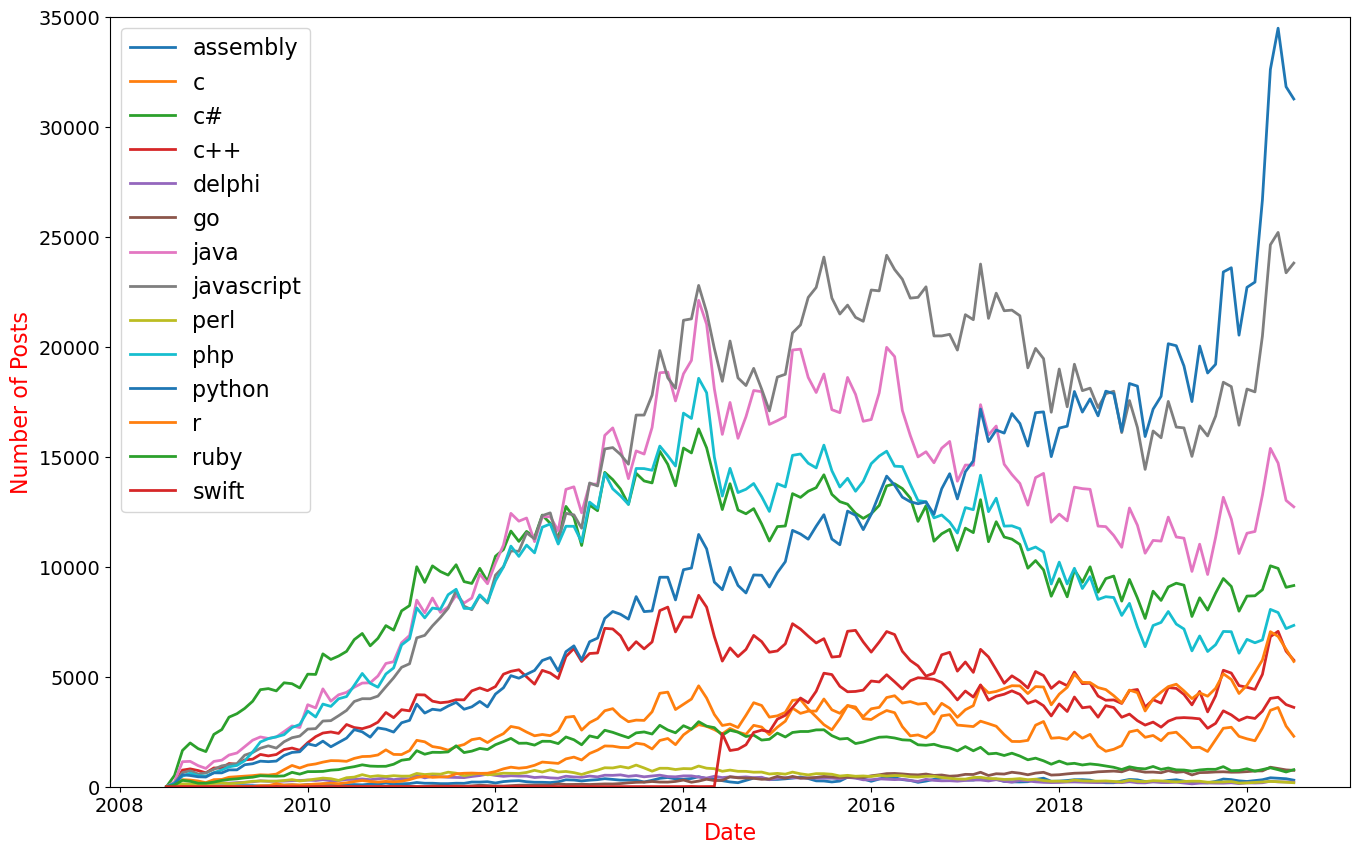

In [94]:
fig = plt.figure(figsize =(16,10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Date', fontsize=16 , color = 'r')
plt.ylabel('Number of Posts', fontsize=16 , color='r')
plt.ylim(0, 35000)
# plot all columns
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],linewidth = 2,label=reshaped_df[column].name)
plt.legend(fontsize = 16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

A useful technique to make a trend apparent is to smooth out the observations by taking an average. By averaging say, 6 or 12 observations we can construct something called the rolling mean. Essentially we calculate the average in a window of time and move it forward by one observation at a time.

Since this is such a common technique, Pandas actually two handy methods already built-in: rolling() and mean(). We can chain these two methods up to create a DataFrame made up of the averaged observations.legend(fontsize=16)

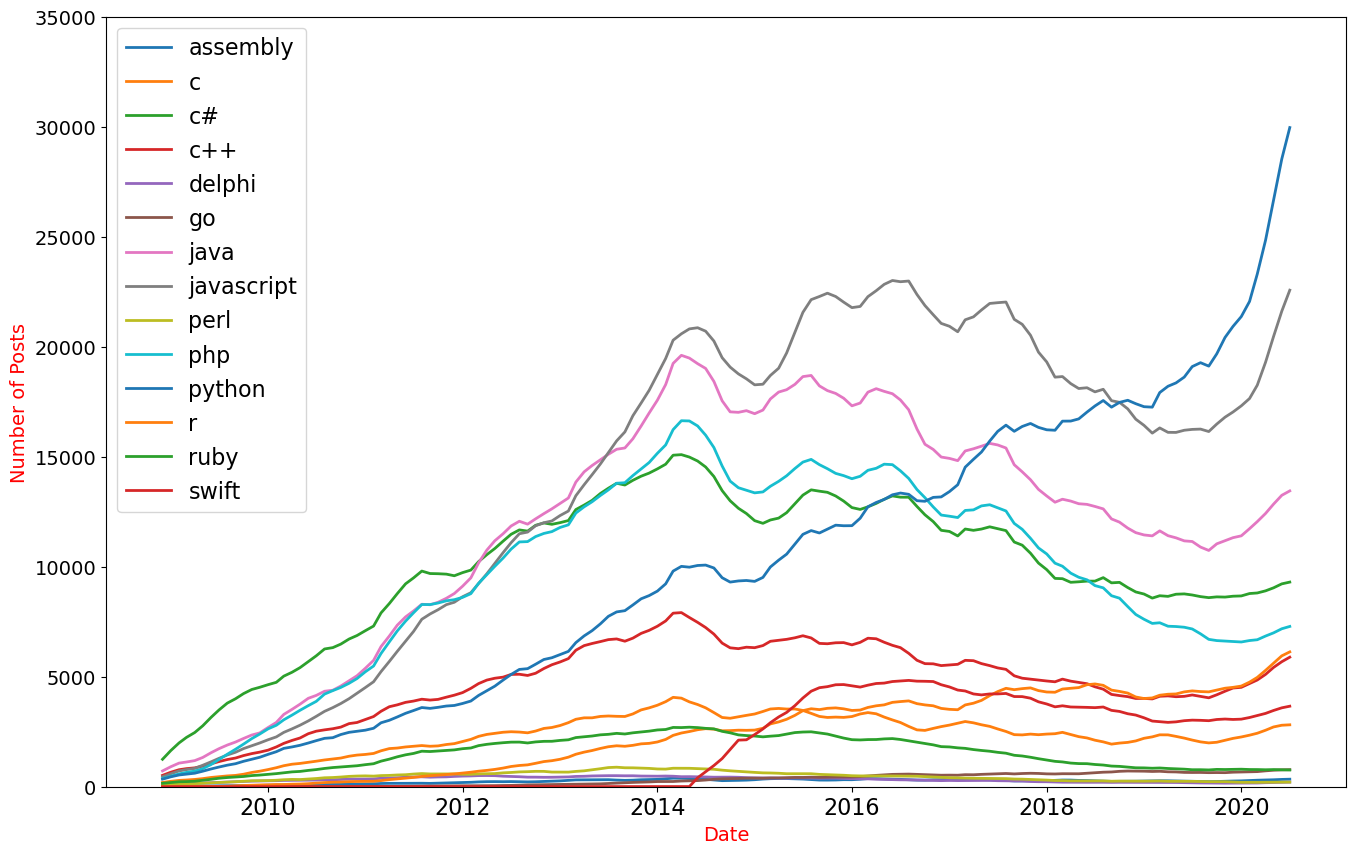

In [100]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14,color = 'r')
plt.ylabel('Number of Posts', fontsize=14,color = 'r')
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=2, label=roll_df[column].name)

plt.legend(fontsize=16)

Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

used .groupby() to explore the number of posts and entries per programming language

converted strings to Datetime objects with to_datetime() for easier plotting

reshaped our DataFrame by converting categories to columns using .pivot()

used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

created (multiple) line charts using .plot() with a for-loop

styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

added a legend to tell apart which line is which by colour

smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.



## Well done for completing today's lessons! Have a good rest. I'll see you tomorrow! 